In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_csv= pd.read_csv('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 1/train.csv')
unique_csv = pd.read_csv('C:/Users/zzaik/OneDrive/SMU work/quantifying the world/case study/case study 1/unique_m.csv')

In [37]:
train_csv.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [38]:
unique_csv.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [3]:
unique_csv = unique_csv.drop('material', axis=1)

In [40]:
unique_csv.dtypes

H                float64
He                 int64
Li               float64
Be               float64
B                float64
                  ...   
Bi               float64
Po                 int64
At                 int64
Rn                 int64
critical_temp    float64
Length: 87, dtype: object

In [41]:
train_csv.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [4]:
df = pd.concat([train_csv, unique_csv], axis=1)
df=df.loc[:,~df.columns.duplicated()]
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [43]:
df.shape

(21263, 168)

In [44]:
train_csv.shape

(21263, 82)

In [45]:
unique_csv.shape

(21263, 87)

In [5]:
X = df.drop('critical_temp', axis=1).copy()
y = df['critical_temp'].copy()

In [47]:
X.shape

(21263, 167)

In [6]:
scl=StandardScaler()
X_scl= scl.fit_transform(X)
X_scl = pd.DataFrame(data=X_scl, columns=X.columns)

In [49]:
X_scl.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-0.080058,0.046733,-0.451651,-0.158850,-0.611819,0.044358,-0.003707,0.133725,-0.053039,0.378186,...,-0.071179,-0.110785,-0.028601,-0.178115,-0.176113,-0.154764,-0.306457,0.0,0.0,0.0
1,0.614744,0.174269,-0.432071,0.059368,-0.604180,0.777430,-0.015267,0.133725,0.108900,0.134901,...,-0.071179,-0.110785,-0.028601,-0.178115,-0.176113,-0.154764,-0.306457,0.0,0.0,0.0
2,-0.080058,0.046733,-0.450978,-0.158850,-0.611658,0.044358,-0.218984,0.133725,0.093294,0.378186,...,-0.071179,-0.110785,-0.028601,-0.178115,-0.176113,-0.154764,-0.306457,0.0,0.0,0.0
3,-0.080058,0.046733,-0.451314,-0.158850,-0.611739,0.044358,-0.103615,0.133725,0.020128,0.378186,...,-0.071179,-0.110785,-0.028601,-0.178115,-0.176113,-0.154764,-0.306457,0.0,0.0,0.0
4,-0.080058,0.046733,-0.452324,-0.158850,-0.611980,0.044358,0.162775,0.133725,-0.199372,0.378186,...,-0.071179,-0.110785,-0.028601,-0.178115,-0.176113,-0.154764,-0.306457,0.0,0.0,0.0


In [7]:
linear_regression = LinearRegression()

X_train, X_test, y_train, y_test= train_test_split(X_scl, y, test_size=0.2, shuffle=True, random_state=1)
linear_regression.fit(X_train, y_train)
y_hat = linear_regression.predict(X_test)

RMSE = mean_squared_error(y_test, y_hat, squared=False)

In [8]:
print('Simple regression RMSE=', RMSE)

Simple regression RMSE= 16.874902276887134


In [9]:
linear_regression.fit(X_scl, y)
for i in range(len(X_scl.columns)):
    print(X_scl.columns[i], linear_regression.coef_[i])

number_of_elements 0.21029377779918518
mean_atomic_mass 25.033679345835672
wtd_mean_atomic_mass -39.99000182886858
gmean_atomic_mass -12.373361367121932
wtd_gmean_atomic_mass 24.9794028528381
entropy_atomic_mass -8.536807778728397
wtd_entropy_atomic_mass 2.163601885761944
range_atomic_mass 10.404719066762858
wtd_range_atomic_mass 3.1164222111790996
std_atomic_mass -9.67199333581592
wtd_std_atomic_mass 0.04494643143409105
mean_fie -16.052122292543473
wtd_mean_fie 5.760608158867024
gmean_fie 12.035500292580652
wtd_gmean_fie 0.49853922906325965
entropy_fie -4.58534330170497
wtd_entropy_fie 18.257439613650458
range_fie 16.141652169735103
wtd_range_fie 4.522737348653099
std_fie -11.592047403089532
wtd_std_fie -4.303845924606862
mean_atomic_radius -13.421499822121273
wtd_mean_atomic_radius 60.11830158212606
gmean_atomic_radius 8.621743514094192
wtd_gmean_atomic_radius -64.29873004556613
entropy_atomic_radius -6.774366852478828
wtd_entropy_atomic_radius 7.661040590884693
range_atomic_radius 3

In [13]:
alpha_list = []
rmse_list = []

X_train, X_test, y_train, y_test= train_test_split(X_scl, y, test_size=0.2, shuffle=True, random_state=1)
for alpha in [1,.1,.01,.001,2,3,10,20]:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_hat = lasso_model.predict(X_test)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    print('alpha=', alpha)
    print('Lasso RMSE=', RMSE)
    alpha_list.append(alpha)
    rmse_list.append(RMSE)

alpha= 1
Lasso RMSE= 18.80483872117835
alpha= 0.1
Lasso RMSE= 17.324462282832954
alpha= 0.01
Lasso RMSE= 16.87942055871092
alpha= 0.001
Lasso RMSE= 16.853189112291123
alpha= 2
Lasso RMSE= 19.608273609332965
alpha= 3
Lasso RMSE= 20.538966319081936
alpha= 10
Lasso RMSE= 24.746174465012704
alpha= 20
Lasso RMSE= 30.84835133242838


In [14]:
import numpy as np
alpha_list2 = []
cv1_l = []
cv2_l = []
cv3_l = []
cv4_l = []
cv5_l = []
cv_avg =[]
for alpha in [1,.1,.01,.001,2,3,10,20]:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_scl, y)
    cv1 = -cross_val_score(lasso_model, X_scl,y, scoring='neg_root_mean_squared_error')
    alpha_list2.append(alpha)
    cv1_l.append(cv1[0])
    cv2_l.append(cv1[1])
    cv3_l.append(cv1[2])
    cv4_l.append(cv1[3])
    cv5_l.append(cv1[4])
    cv_avg.append(np.mean(cv1))
    
    
    
    
    print(alpha, cv1)
    print('--------')

1 [25.53544834 24.46361159 17.63167027 11.66778444 18.79131639]
--------
0.1 [23.17442695 24.96454694 17.52998879 12.87347997 18.50718363]
--------
0.01 [22.45729079 33.39880819 18.14319875 23.87729113 18.95274503]
--------
0.001 [22.31042681 35.80086564 18.39850734 26.28857348 19.16247728]
--------
2 [27.26929422 25.90266598 18.78444103 12.18410677 18.87990315]
--------
3 [28.65179064 27.29110596 19.23502242 13.25229996 18.86800479]
--------
10 [35.22003707 32.99825351 22.95240906 19.98065723 20.3336403 ]
--------
20 [44.4324062  41.41593819 29.14509734 30.31926961 26.36940135]
--------


In [20]:
data = { 
    'Alpha Value':alpha_list2,
    'CV1 RMSE': cv1_l ,
    'CV2 RMSE': cv2_l ,
        'CV3 RMSE': cv3_l ,
            'CV4 RMSE': cv4_l ,
    'CV5 RMSE': cv5_l ,
        'CV AVG RMSE': cv_avg ,
}
df = pd.DataFrame(data)


df

,Alpha Value,CV1 RMSE,CV2 RMSE,CV3 RMSE,CV4 RMSE,CV5 RMSE,CV AVG RMSE
0,1.000,25.535448,24.463612,17.631670,11.667784,18.791316,19.617966
1,0.100,23.174427,24.964547,17.529989,12.873480,18.507184,19.409925
2,0.010,22.457291,33.398808,18.143199,23.877291,18.952745,23.365867
3,0.001,22.310427,35.800866,18.398507,26.288573,19.162477,24.392170
4,2.000,27.269294,25.902666,18.784441,12.184107,18.879903,20.604082
5,3.000,28.651791,27.291106,19.235022,13.252300,18.868005,21.459645
6,10.000,35.220037,32.998254,22.952409,19.980657,20.333640,26.296999
7,20.000,44.432406,41.415938,29.145097,30.319270,26.369401,34.336423


[25.53544833794732,
 23.174426948034927,
 22.45729078926187,
 22.310426814557925,
 27.269294221185504,
 28.651790637287714,
 35.22003706894788,
 44.43240620232527]

In [22]:
lasso_model = Lasso(alpha=.1)
lasso_model.fit(X_scl, y)
var_list1 = []
coeff_list1 = []
coeff_abs_list1 = []
for i in range(len(X_scl.columns)):
    print(X_scl.columns[i], lasso_model.coef_[i],abs(lasso_model.coef_[i]))
    var_list1.append(X_scl.columns[i])
    coeff_list1.append(lasso_model.coef_[i])
    coeff_abs_list1.append(abs(lasso_model.coef_[i]))

number_of_elements 0.0 0.0
mean_atomic_mass 0.0 0.0
wtd_mean_atomic_mass -0.5335508770261013 0.5335508770261013
gmean_atomic_mass 0.0 0.0
wtd_gmean_atomic_mass -0.0 0.0
entropy_atomic_mass -0.0 0.0
wtd_entropy_atomic_mass 3.469887363778612 3.469887363778612
range_atomic_mass 8.5740583759223 8.5740583759223
wtd_range_atomic_mass -1.8049528283335672 1.8049528283335672
std_atomic_mass 0.0 0.0
wtd_std_atomic_mass -6.01225912146863 6.01225912146863
mean_fie 0.0 0.0
wtd_mean_fie 0.0 0.0
gmean_fie 1.2880248228056137 1.2880248228056137
wtd_gmean_fie 0.0 0.0
entropy_fie 0.0 0.0
wtd_entropy_fie 0.0 0.0
range_fie 0.0 0.0
wtd_range_fie 0.0 0.0
std_fie -0.0 0.0
wtd_std_fie -0.0 0.0
mean_atomic_radius -0.2530117292141173 0.2530117292141173
wtd_mean_atomic_radius 0.3909759520302625 0.3909759520302625
gmean_atomic_radius -0.2238881834398247 0.2238881834398247
wtd_gmean_atomic_radius 0.0 0.0
entropy_atomic_radius -0.0 0.0
wtd_entropy_atomic_radius 0.0 0.0
range_atomic_radius 0.23145066457500973 0.23145

In [29]:
data2 = { 
    'Variable':var_list1,
    'Coefficient': coeff_list1 ,
    'Coefficient Absolute Value': coeff_abs_list1 
       
}
df2 = pd.DataFrame(data2)


df2.sort_values(by = 'Coefficient Absolute Value', ascending = False).head(n=15)

,Variable,Coefficient,Coefficient Absolute Value
62,wtd_mean_ThermalConductivity,14.727876,14.727876
64,wtd_gmean_ThermalConductivity,-10.212854,10.212854
136,Ba,8.583138,8.583138
7,range_atomic_mass,8.574058,8.574058
10,wtd_std_atomic_mass,-6.012259,6.012259
80,wtd_std_Valence,-5.486741,5.486741
163,Bi,4.378304,4.378304
46,wtd_entropy_ElectronAffinity,-3.984020,3.984020
70,wtd_std_ThermalConductivity,3.767764,3.767764
6,wtd_entropy_atomic_mass,3.469887,3.469887


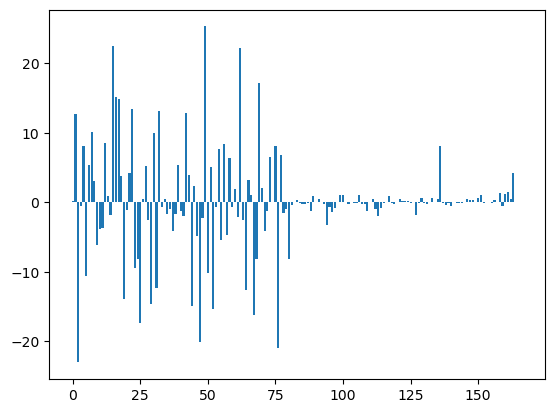

In [33]:
importance = lasso_model.coef_

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X_scl, y, test_size=0.2, shuffle=True, random_state=1)
for alpha in [1,.1,.01,.001,2,3,10,20,100,200,500]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_hat = ridge_model.predict(X_test)

    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    print('alpha=', alpha)
    print('Ridge RMSE=', RMSE)

alpha= 1
Ridge RMSE= 16.85567290643621
alpha= 0.1
Ridge RMSE= 16.871498483073633
alpha= 0.01
Ridge RMSE= 16.87453229070468
alpha= 0.001
Ridge RMSE= 16.87486494953636
alpha= 2
Ridge RMSE= 16.849243024267444
alpha= 3
Ridge RMSE= 16.846642743555464
alpha= 10
Ridge RMSE= 16.85314599392032
alpha= 20
Ridge RMSE= 16.875046000597543
alpha= 100
Ridge RMSE= 17.021253590361688
alpha= 200
Ridge RMSE= 17.135367476079256
alpha= 500
Ridge RMSE= 17.33143111469584


In [34]:
alpha_list3 = []
cv1_2 = []
cv2_2 = []
cv3_2 = []
cv4_2 = []
cv5_2 = []
cv_avg2 =[]   



for alpha in [1,.1,.01,.001,2,3,10,20,100,200,500]:

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_scl, y)
    cv2 = -cross_val_score(ridge_model, X_scl,y, scoring='neg_root_mean_squared_error')
    alpha_list3.append(alpha)
    cv1_2.append(cv2[0])
    cv2_2.append(cv2[1])
    cv3_2.append(cv2[2])
    cv4_2.append(cv2[3])
    cv5_2.append(cv2[4])
    cv_avg2.append(np.mean(cv2))    
    
    
    
    
    
    
    print(alpha, -cross_val_score(ridge_model, X_scl,y, scoring='neg_root_mean_squared_error'))
    print('--------')

1 [22.23749661 37.30860743 18.43683396 26.25549292 19.3435498 ]
--------
0.1 [22.21348795 38.46188638 18.45044805 26.15201972 19.38666402]
--------
0.01 [22.21071454 38.64247272 18.45102739 26.12951543 19.39784627]
--------
0.001 [22.21043227 38.66170547 18.45107568 26.12712179 19.39915313]
--------
2 [22.25883151 36.60961649 18.41504778 26.23447637 19.32797528]
--------
3 [22.27663266 36.13928787 18.39286242 26.15916805 19.31954517]
--------
10 [22.35799891 34.43563287 18.27960954 25.35779717 19.31543948]
--------
20 [22.42669195 33.07564969 18.19432403 24.23800293 19.35080845]
--------
100 [22.66068064 28.46688217 17.98672662 18.97979572 19.42066707]
--------
200 [22.80434592 26.27283659 17.86474762 16.30022572 19.2330028 ]
--------
500 [23.05759617 24.08246977 17.67013582 13.96392001 18.61532179]
--------


In [31]:
data3 = { 
    'Alpha Value':alpha_list3,
    'CV1 RMSE': cv1_2 ,
    'CV2 RMSE': cv2_2 ,
        'CV3 RMSE': cv3_2 ,
            'CV4 RMSE': cv4_2 ,
    'CV5 RMSE': cv5_2 ,
        'CV AVG RMSE': cv_avg2 ,
}
df3 = pd.DataFrame(data3)


df3

,Alpha Value,CV1 RMSE,CV2 RMSE,CV3 RMSE,CV4 RMSE,CV5 RMSE,CV AVG RMSE
0,1.000,22.237497,37.308607,18.436834,26.255493,19.343550,24.716396
1,0.100,22.213488,38.461886,18.450448,26.152020,19.386664,24.932901
2,0.010,22.210715,38.642473,18.451027,26.129515,19.397846,24.966315
3,0.001,22.210432,38.661705,18.451076,26.127122,19.399153,24.969898
4,2.000,22.258832,36.609616,18.415048,26.234476,19.327975,24.569189
5,3.000,22.276633,36.139288,18.392862,26.159168,19.319545,24.457499
6,10.000,22.357999,34.435633,18.279610,25.357797,19.315439,23.949296
7,20.000,22.426692,33.075650,18.194324,24.238003,19.350808,23.457095
8,100.000,22.660681,28.466882,17.986727,18.979796,19.420667,21.502950
9,200.000,22.804346,26.272837,17.864748,16.300226,19.233003,20.495032


In [37]:
ridge_model = Ridge(alpha=500)
ridge_model.fit(X_scl, y)
var_list2 = []
coeff_list2 = []
coeff_abs_list2 = []
for i in range(len(X_scl.columns)):
    print(X_scl.columns[i], ridge_model.coef_[i],abs(ridge_model.coef_[i]))
    var_list2.append(X_scl.columns[i])
    coeff_list2.append(ridge_model.coef_[i])
    coeff_abs_list2.append(abs(ridge_model.coef_[i]))    
    
    
    
    
    
    
    
    
    
    
    
    

number_of_elements 1.5574295317656426 1.5574295317656426
mean_atomic_mass 2.3530448587267805 2.3530448587267805
wtd_mean_atomic_mass -3.23396992377492 3.23396992377492
gmean_atomic_mass 1.3759391501114027 1.3759391501114027
wtd_gmean_atomic_mass -0.9656104593371896 0.9656104593371896
entropy_atomic_mass -2.525238734044128 2.525238734044128
wtd_entropy_atomic_mass 3.819098711439549 3.819098711439549
range_atomic_mass 5.2957603840013325 5.2957603840013325
wtd_range_atomic_mass -1.195672729462244 1.195672729462244
std_atomic_mass 1.4371220433117542 1.4371220433117542
wtd_std_atomic_mass -5.298870155747181 5.298870155747181
mean_fie -0.04676902759800333 0.04676902759800333
wtd_mean_fie 0.7048257469301092 0.7048257469301092
gmean_fie 1.0013202276259017 1.0013202276259017
wtd_gmean_fie 0.9047854647990369 0.9047854647990369
entropy_fie 0.7025726087568503 0.7025726087568503
wtd_entropy_fie 1.3180304658679165 1.3180304658679165
range_fie 2.1490901482310925 2.1490901482310925
wtd_range_fie 0.340

In [38]:
data4 = { 
    'Variable':var_list2,
    'Coefficient': coeff_list2 ,
    'Coefficient Absolute Value': coeff_abs_list2 
       
}
df4 = pd.DataFrame(data4)


df4.sort_values(by = 'Coefficient Absolute Value', ascending = False).head(n=15)

,Variable,Coefficient,Coefficient Absolute Value
62,wtd_mean_ThermalConductivity,8.667430,8.667430
136,Ba,8.449943,8.449943
70,wtd_std_ThermalConductivity,6.580015,6.580015
80,wtd_std_Valence,-6.057583,6.057583
64,wtd_gmean_ThermalConductivity,-5.449864,5.449864
10,wtd_std_atomic_mass,-5.298870,5.298870
7,range_atomic_mass,5.295760,5.295760
49,std_ElectronAffinity,4.388464,4.388464
44,wtd_gmean_ElectronAffinity,-4.313547,4.313547
163,Bi,3.992491,3.992491


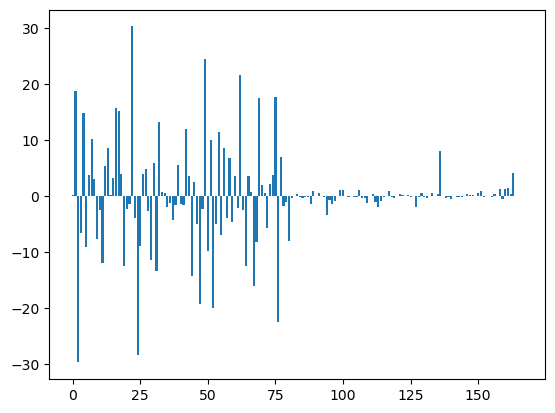

In [34]:
importance = ridge_model.coef_

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

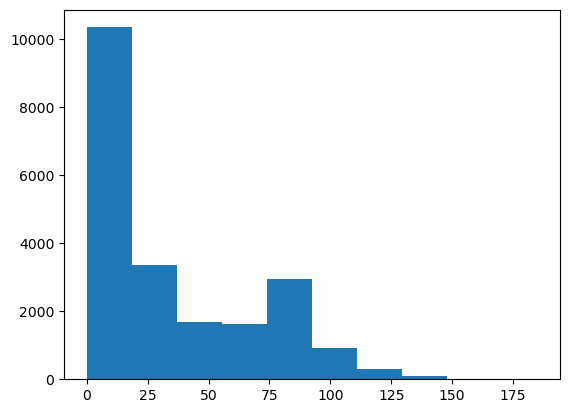

In [56]:
#We noticed that the second fold RMSEs are not close to the rest folds, 
#The reason is presumed that the value of response variable is heavily right skewed. One of the fold may contain large amount
#of skewed values.
import matplotlib.pyplot as plt
plt.hist(df.critical_temp)
plt.show()